Positive Tweets for Sachin Tendulkar is 77.17 %
Negative Tweets for Sachin Tendulkar is 3.26 %
Neutral Tweets for Sachin Tendulkar is 19.57 %


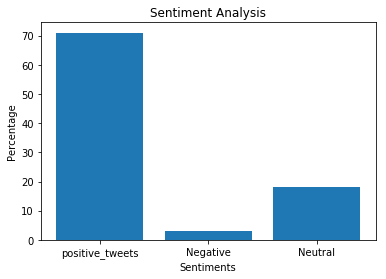

In [8]:
import re 
import tweepy 
from tweepy import OAuthHandler 
from textblob import TextBlob 
import import_ipynb
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
import credentials
import twitter
  
class SentimentAnalyzer(object): 
    
    def __init__(self): 
  
        try: 
            #connect to twitter and authenticate account and enter your keys
            self.auth = OAuthHandler(credentials.consumer_key, credentials.consumer_secret) 
            self.auth.set_access_token(credentials.access_token, credentials.access_token_secret)
            self.api = tweepy.API(self.auth) 
        except: 
            print("Error: Authentication Failed")
            
    def tweet_cleaner(self, tweet):
        #clean the tweet
        return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())
    
    def percentage(self, tweet, total_tweet):
        perc = 100 * float(tweet) / float(total_tweet)
        return format(perc, '.2f')
    
    def access_sentiment(self, tweet): 
        #accessing sentiments using polarity
        tweet_output = TextBlob(self.tweet_cleaner(tweet)) 
        if tweet_output.sentiment.polarity > 0: 
            return 1
        elif tweet_output.sentiment.polarity==0: 
            return 0
        else:
            return -1 
                               
    def get_tweets(self, query, count = 10): 
        # four empty lists to store values of positive,negative and neutral tweets
        tweets_pos = [] 
        tweets_neg = []
        tweets_neu = []
  
        try:  
            fetched_tweets = self.api.search(q = query, count = count) 
            for tweet in fetched_tweets:  
                parsed_tweet = {} 
                parsed_tweet['text'] = tweet.text 
                if self.access_sentiment(tweet.text) == 1:
                    tweets_pos.append(1)
                elif self.access_sentiment(tweet.text) == -1:
                    tweets_neg.append(-1)
                elif self.access_sentiment(tweet.text) == 0:
                    tweets_neu.append(0)
                else:
                    print("Error Occured")
  
            return (len(tweets_pos), len(tweets_neg), len(tweets_neu)) 
        except tweepy.TweepError as te: 
            print("Error Occured : " + str(te)) 
            

    
def main(): 
    #data representation
    api = SentimentAnalyzer() 
    query = 'Sachin Tendulkar'
    tweets = api.get_tweets(query, count = 200) 
    count = tweets[0] + tweets[1] + tweets[2]
    positive_tweets= api.percentage(tweets[0],count)
    negative_tweets= api.percentage(tweets[1],count)
    neutral_tweets= api.percentage(tweets[2],count)
    print("Positive Tweets for {} is {} %".format(query,positive_tweets))
    print("Negative Tweets for {} is {} %".format(query,negative_tweets))
    print("Neutral Tweets for {} is {} %".format(query,neutral_tweets))
    sentiments=('positive_tweets', 'Negative', 'Neutral')
    percentage=[tweets[0], tweets[1], tweets[2]]

    plt.bar(sentiments,percentage,align='center')
    plt.title("Sentiment Analysis")
    plt.xlabel('Sentiments')
    plt.ylabel('Percentage')
    plt.show()

            
if __name__ == "__main__": 
    main()